In [24]:
import sys, os, re, random, warnings, pickle
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from config import *
from utils import *
from ssqa import *

sns.set(style="whitegrid", palette="muted")
warnings.filterwarnings("ignore")

In [139]:
rho_df = pd.read_csv(f"{MUT_DATA}/rho_df.csv", index_col = 0).dropna()
cols = ["ind/E",
                                   "ind/sup/DP", "ind/sup/PM", "ind/sup/PM+DP", "ind/sup/E+DP", "ind/sup/E+PM",
                                   "ind/sup/E+DP+PM",
                                   "ind/unsup/DP", "ind/unsup/PM", "ind/unsup/PM+DP", "ind/unsup/E+DP",
                                   "ind/unsup/E+PM", "ind/unsup/E+DP+PM", "dca/E",
                                   "dca/sup/DP", "dca/sup/PM", "dca/sup/PM+DP", "dca/sup/E+DP", "dca/sup/E+PM",
                                   "dca/sup/E+DP+PM",
                                   "dca/unsup/DP", "dca/unsup/PM", "dca/unsup/PM+DP", "dca/unsup/E+DP",
                                   "dca/unsup/E+PM", "dca/unsup/E+DP+PM"
                                   ]

grouper = rho_df.groupby("dataset")
rho_df2 = grouper.first()[["fam","exp","inpdb","size","length"]]
for c in cols:
    rho_df2[c] = grouper.max(c)[c]
rho_df2["best"] = rho_df2[cols[2:]].max(1)
rho_df2 = rho_df2.sort_values("best")
rho_df2 = rho_df2.reset_index()

In [141]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#56ae57', 
       '#efb435', '#d3b683', '#c9d179', '#9d0759', "orange", "red"]
random.shuffle(cols)
color = {k:v for k,v in zip(rho_df.fam.unique(), cols)}

In [140]:
names = ["Independant", "Epistatic", "Dot Product", "Dot Product + Independant", "Dot Product + Epistatic",
         "Pattern Matching", "Pattern Matching + Independant", "Pattern Matching + Epistatic",
         "Interpolation", "Pattern Matching + Dot Product + Epistatic"]

In [7]:
names = ["DYR_ECOLI_Shakhnovich2012",
"TRY2_RAT_Ranganathan2009",
"BLAT_ECOLX_Ranganathan2015",

"BLAT_ECOLX_Ostermeier2014",
"PABP_YEAST_Fields2013-doubles",
"POL_HV1N5_Ndungu2014",
"FYN_HUMAN_Davidson2003",
"PABP_YEAST_Fields2013-singles",

"BLAT_ECOLX_Palzkill2012",
"BLAT_ECOLX_LowThroughput2014-averaged",
"RL401_YEAST_Bolon2013",
"BLAT_ECOLX_Tenaillon2013-singles",
"KKA2_KLEPN_Mikkelsen2014",
"GAL4_YEAST_Shendure2015",
"RL401_YEAST_Bolon2014",
"MTH3_HAEAESTABILIZED_Tawfik2015",
"POLG_HCVJF_Sun2014",
"HSP82_YEAST_Bolon2016",
"BG_STRSQ_Abate2015",
"PYP_HALHA_Hoff2010",
"YAP1_HUMAN_Fields2012-singles",
"BRCA1_HUMAN_Fields2015",
"UBE4B_MOUSE_Klevit2013-singles",
]
E = [0.645,0.76, 0.7, 0.705, 0.62, 0.84, 0.69, 0.59, 0.51, 0.87, 0.445, 0.685, 0.61, 0.625, 0.4, 0.68, 0.58, 0.49, 0.64, 0.55, 0.57, 0.56, 0.52]
DPE = [
    0.76, 0.575, 0.805, .8, .76, .74, .62, .75, .73, .725, .72, .67, .69, .68, .705, .665, .663, .675, .64, .635, .635, 0.52, .53  
]
PME = [
    .86, .825, .75, .75, .715, .76, .65, .62, .615, .69, .42, .695, .67, .64, .42, .68, .63, .58, .65, .55, .51, .41, .52 
]
DPPME = [
    .87, .78, .815, .81, .78, .65, .755, .745, .75, .655, .715, .67, .705, .705, .685, .69, .67, .69, .67, .57, .59, .55, .58
]

23

In [142]:
rho_df2

,dataset,fam,exp,inpdb,size,length,ind/E,ind/sup/DP,ind/sup/PM,ind/sup/PM+DP,...,dca/sup/E+DP,dca/sup/E+PM,dca/sup/E+DP+PM,dca/unsup/DP,dca/unsup/PM,dca/unsup/PM+DP,dca/unsup/E+DP,dca/unsup/E+PM,dca/unsup/E+DP+PM,best
0,Mikkelsen2014,KKA2_KLEPN,Ami11_avg,1,4398,264,0.070501,0.226605,0.204839,0.242011,...,0.241427,0.198661,0.244141,0.034670,0.056975,0.057833,0.068085,0.077838,0.084990,0.247987
1,Bolon2016,HSP82_YEAST,selection_coefficient,1,4104,240,0.427014,0.490312,0.413495,0.492335,...,0.539978,0.538550,0.539987,0.109429,0.051308,0.048450,0.490491,0.483210,0.495992,0.546459
2,Palzkill2012,BLAT_ECOLX,ddG_stat,1,4808,263,0.432401,0.502056,0.531726,0.573089,...,0.502320,0.537039,0.573073,0.031901,0.013940,0.011150,0.031902,0.013940,0.011150,0.573089
3,Hoff2010,PYP_HALHA,lambda_max,1,43,125,0.299949,0.372275,0.233440,0.326066,...,0.579696,0.504693,0.615094,0.479437,0.314254,0.322175,0.536651,0.539494,0.535573,0.615094
4,Abate2015,BG_STRSQ,enrichment,1,2634,501,0.542075,0.305925,0.287551,0.312257,...,0.650145,0.623802,0.648067,0.010069,0.040442,0.040105,0.632091,0.632155,0.632370,0.650145
5,Tenaillon2013-singles,BLAT_ECOLX,MIC_score,1,951,263,0.579785,0.200871,0.141914,0.191810,...,0.690533,0.598164,0.658632,0.052020,0.064658,0.063569,0.682174,0.682160,0.684172,0.690533
6,Ostermeier2014,BLAT_ECOLX,linear,1,4611,263,0.612961,0.439735,0.448271,0.485107,...,0.741282,0.728319,0.711991,0.027196,0.022004,0.028024,0.703877,0.704301,0.704192,0.741282
7,Ranganathan2015,BLAT_ECOLX,0,1,4807,263,0.598872,0.548537,0.545402,0.584961,...,0.734590,0.716971,0.749085,0.107937,0.050690,0.049049,0.696823,0.696842,0.697428,0.749085
8,Davidson2003,FYN_HUMAN,Tm,1,48,66,0.422484,0.337300,0.304578,0.349878,...,0.643333,0.730303,0.629697,0.516772,0.316340,0.316340,0.737879,0.737879,0.773030,0.773030
9,Ranganathan2009,TRY2_RAT,Tm,1,23,223,0.400000,0.680000,0.740000,0.744157,...,0.560000,0.580000,0.640000,0.480000,0.640000,0.640000,0.800000,0.800000,0.740000,0.800000


In [69]:
rho_df2.loc[0]

dataset                Hoff2010
fam                   PYP_HALHA
exp                  lambda_max
inpdb                         1
size                         43
length                      125
ind/E                  0.299949
ind/sup/DP             0.372275
ind/sup/PM              0.23344
ind/sup/PM+DP          0.326066
ind/sup/E+DP            0.39318
ind/sup/E+PM           0.370833
ind/sup/E+DP+PM        0.420361
ind/unsup/DP           0.407446
ind/unsup/PM           0.274841
ind/unsup/PM+DP        0.274841
ind/unsup/E+DP         0.311706
ind/unsup/E+PM         0.285457
ind/unsup/E+DP+PM      0.478729
dca/E                  0.536651
dca/sup/DP             0.559262
dca/sup/PM              0.48407
dca/sup/PM+DP          0.494205
dca/sup/E+DP           0.579696
dca/sup/E+PM           0.504693
dca/sup/E+DP+PM        0.615094
dca/unsup/DP           0.479437
dca/unsup/PM           0.314254
dca/unsup/PM+DP        0.322175
dca/unsup/E+DP         0.536651
dca/unsup/E+PM         0.539494
dca/unsu

In [47]:
rho_df2["dca/sup/E+DP+PM"]

0    0.615094
1    0.658632
2    0.629697
3    0.640000
4    0.789906
5    0.857918
6    1.000000
Name: dca/sup/E+DP+PM, dtype: float64

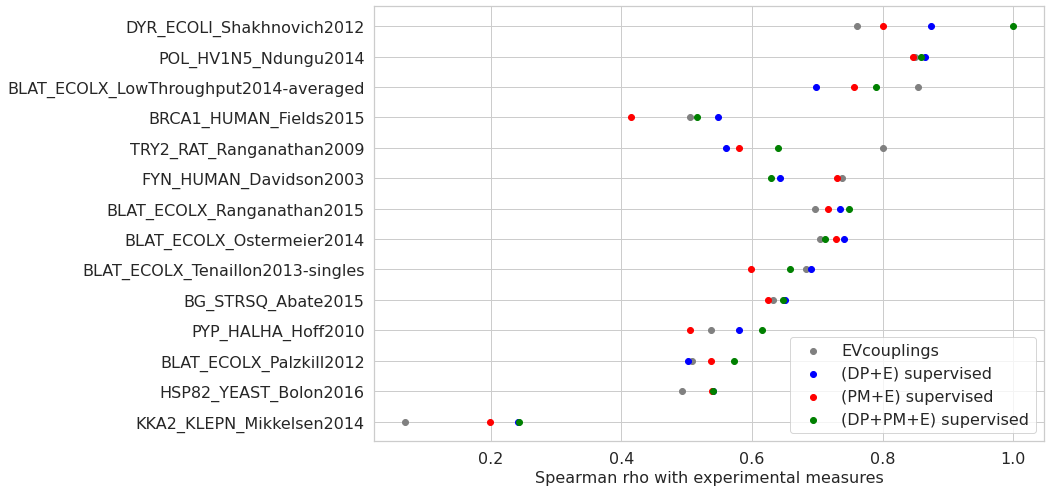

In [143]:
plt.figure(figsize=(12,8))
plt.scatter(rho_df2["dca/E"],rho_df2["dca/E"].index, c = "gray")
plt.scatter(rho_df2["dca/sup/E+DP"],rho_df2["dca/sup/E+DP"].index, c = "blue")
plt.scatter(rho_df2["dca/sup/E+PM"],rho_df2["dca/sup/E+PM"].index, c = "red")
plt.scatter(rho_df2["dca/sup/E+DP+PM"],rho_df2["dca/sup/E+DP+PM"].index, c="green")

plt.legend(["EVcouplings", "(DP+E) supervised", "(PM+E) supervised", "(DP+PM+E) supervised"], loc = 4, fontsize = 16)
plt.yticks(rho_df2.index, [f"{fam}_{name_dataset}" for fam, name_dataset in zip(rho_df2.fam.values,rho_df2.dataset.values)], rotation = 0)
plt.xlabel("Spearman rho with experimental measures",fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

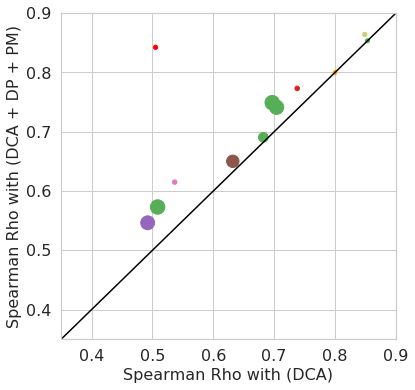

In [75]:
plt.figure(figsize = (6,6))
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlim(0.35, 0.9)
plt.ylim(0.35, 0.9)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel("Spearman Rho with (DCA)", fontsize = 16)
plt.ylabel("Spearman Rho with (DCA + DP + PM)", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

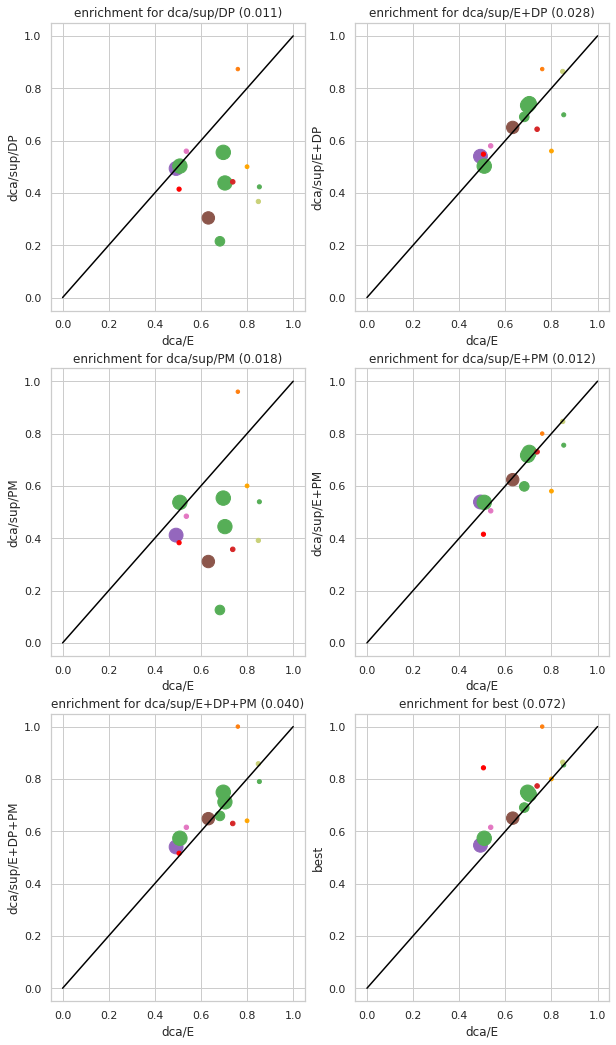

In [79]:
plt.figure(figsize = (10,18))

plt.subplot(3,2,1)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/DP")
plt.title(f'enrichment for dca/sup/DP ({(rho_df2["dca/sup/DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,2)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP")
plt.title(f'enrichment for dca/sup/E+DP ({(rho_df2["dca/sup/E+DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,3)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/PM")
plt.title(f'enrichment for dca/sup/PM ({(rho_df2["dca/sup/PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,4)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+PM")
plt.title(f'enrichment for dca/sup/E+PM ({(rho_df2["dca/sup/E+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,5)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP+PM")
plt.title(f'enrichment for dca/sup/E+DP+PM ({(rho_df2["dca/sup/E+DP+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2, 6)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("best")
plt.title(f'enrichment for best ({(rho_df2["best"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')


plt.show()

In [129]:
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score

from scipy.stats import spearmanr, pearsonr

In [120]:
clf.predict(X2), y2

(array([ 0.02506631,  0.05847682, -0.14018482,  0.4052741 ,  0.05925177,
         0.05849682,  0.05847692, -0.22613684,  0.00279478, -0.16192522,
         0.06090461,  0.01420206, -0.0902107 ]),
 0    -0.002649
 1     0.066834
 2    -0.138555
 3    -0.041362
 4    -0.143599
 5    -0.017642
 6    -0.024278
 7     0.126797
 8     0.035091
 9    -0.277451
 10    0.078636
 11   -0.020751
 12   -0.087559
 dtype: float64)

In [148]:
print(pearsonr(y, X[:,0]))

(0.22846582483749392, 0.16183419136585397)


(0.06359258756896684, 0.8290075403416102)


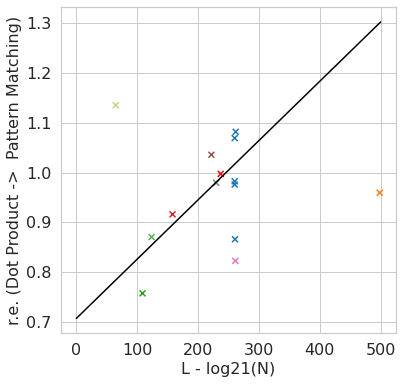

In [154]:
clf = RANSACRegressor()

plt.figure(figsize = (6, 6))
X = rho_df["length"].values[:,None] - np.log(rho_df["size"].values[:,None])/np.log(21)
X2 = rho_df2["length"].values[:,None] - np.log(rho_df2["size"].values[:,None])/np.log(21)
m,M = 0,max(X)+10

y = np.log(rho_df["dca/sup/E+PM"]/rho_df["dca/sup/E+DP"])
y2 = np.log(rho_df2["dca/sup/E+PM"]/rho_df2["dca/sup/E+DP"])
y = np.exp(y)
y2 = np.exp(y2)

clf.fit(X,y)
print(pearsonr(y2, clf.predict(X2)))
x = np.linspace(0, 500, 551)[:,None]
plt.plot(x, clf.predict(x), c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (Dot Product ->  Pattern Matching)", fontsize = 16)
plt.xlabel("L - log21(N)", fontsize = 16)
#plt.xlim(m,M)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()


KeyError: 'dot_epi'

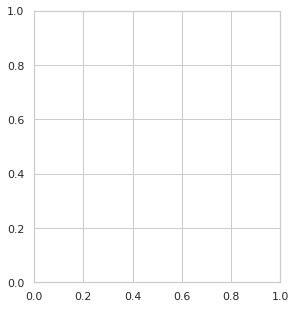

In [86]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)

clf = HuberRegressor()
clf.fit(rho_df2["length"].values[:,None], np.log(rho_df2["dot_epi"]/rho_df2["epistatic"]))

x = np.linspace(0, 600, 551)
plt.plot(x, x*clf.coef_+clf.intercept_, c="black")
plt.scatter(rho_df2["length"], np.log(rho_df2["dot_epi"]/rho_df2["epistatic"]), color = rho_df2.fam.apply(lambda x : color[x]), 
            s = rho_df2["length"]/np.log10(rho_df2["size"]), 
            marker = "o")
plt.xlabel("length")
plt.ylabel("relative improvement with ssqa")
plt.xlim(0,550)
plt.title("Log dot_epi/epistatic")

plt.subplot(1,3,2)
clf = HuberRegressor()
clf.fit(rho_df2["length"].values[:,None], np.log(rho_df2["matching_epi"]/rho_df2["epistatic"]))
x = np.linspace(0, 600, 551)
plt.plot(x, x*clf.coef_+clf.intercept_, c="black")
plt.scatter(rho_df2["length"], np.log(rho_df2["matching_epi"]/rho_df2["epistatic"]), color = rho_df2.fam.apply(lambda x : color[x]), 
            s = rho_df2["length"]/np.log10(rho_df2["size"]), 
            marker = "o")
plt.xlabel("length")
plt.ylabel("improvement")
plt.xlim(0,550)
print(clf.coef_)
plt.title("Log matching_epi/epistatic")

plt.subplot(1,3,3)
clf = HuberRegressor()
clf.fit(rho_df2["length"].values[:,None], np.log(rho_df2["combine_epi"]/rho_df2["epistatic"]))
x = np.linspace(0, 600, 551)
plt.plot(x, x*clf.coef_+clf.intercept_, c="black")
plt.scatter(rho_df2["length"], np.log(rho_df2["combine_epi"]/rho_df2["epistatic"]), color = rho_df2.fam.apply(lambda x : color[x]), 
            s = rho_df2["length"]/np.log10(rho_df2["size"]), 
            marker = "o")
plt.xlabel("length")
plt.ylabel("improvement")
plt.title("Log combine_epi/epistatic")

We use as a baseline the secondary structure before matching (the probability at each residue of having secondary structure $s_i$):

let $p_i(x_0)$ be the distribution for reference secondary structure at residue $i$ and $p_i(x)$ the one for sequence $x$. Then $(q_i(x_0) = ~<p_i(x_0)|p_i(x)>)_i$ is a vector of local features for secondary structure quality. By supervising on this vectors we get a new SSQA metric before matching.

We can then plot the relative enrichment $r.e. = \log(\frac{\rho_{SSQA_{matching}}}{\rho_{SSQA_{nomatching}}})$ in function of $\frac{L}{\log10(N)}$ where $L$ is the length of the reference sequence and $N$ the size of the training dataset. We then have a good correlation between the two variables by performing a linear regression. 

The matching become interesting when $\frac{L}{\log10(N)} > 91$, for example when $L = 300$ and $N < 1000$ or when $L = 200$ and $N < 100$

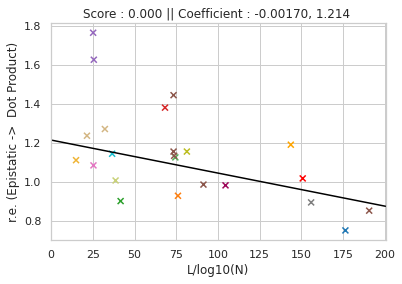

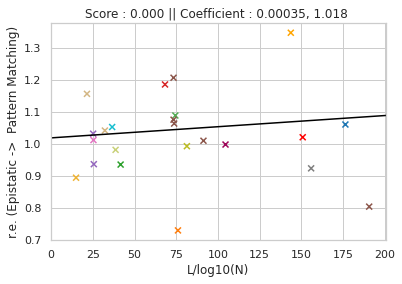

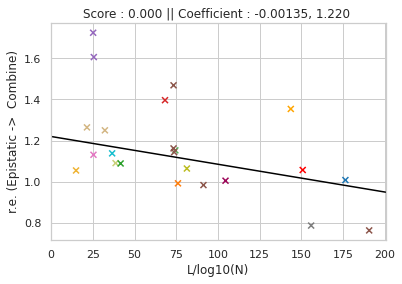

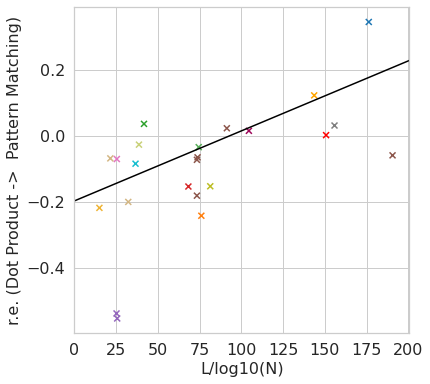

In [62]:
rho_df = rho_df.dropna()
rho_df2 = rho_df2.dropna()

X = rho_df["length"].values[:,None]/np.log10(0.8*rho_df["size"].values[:,None])
X2 = rho_df2["length"].values[:,None]/np.log10(0.8*rho_df2["size"].values[:,None])
m,M = 0,max(X)+10
x = np.linspace(m,M,100)

clf = HuberRegressor()
y = rho_df["dot_epi"]/rho_df["epistatic"]
y2 =  rho_df2["dot_epi"]/rho_df2["epistatic"]
clf.fit(X,y)
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (Epistatic ->  Dot Product)")
plt.xlabel("L/log10(N)")
plt.xlim(m,M)
plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()

clf = HuberRegressor()
y = rho_df["matching_epi"]/rho_df["epistatic"]
y2 = rho_df2["matching_epi"]/rho_df2["epistatic"]

clf.fit(X,y)
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (Epistatic ->  Pattern Matching)")
plt.xlabel("L/log10(N)")
plt.xlim(m,M)
plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()

clf = HuberRegressor()
y = rho_df["combine_epi"]/rho_df["epistatic"]
y2 = rho_df2["combine_epi"]/rho_df2["epistatic"]

clf.fit(X,y)
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (Epistatic ->  Combine)")
plt.xlabel("L/log10(N)")
plt.xlim(m,M)
plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()


clf = HuberRegressor()
plt.figure(figsize = (6, 6))
y = np.log(rho_df["matching_epi"]/rho_df["dot_epi"])
y2 = np.log(rho_df2["matching_epi"]/rho_df2["dot_epi"])
clf.fit(X,y)
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (Dot Product ->  Pattern Matching)", fontsize = 16)
plt.xlabel("L/log10(N)", fontsize = 16)
plt.xlim(m,M)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()
